In [10]:
# notebooks/02_Quantitative_Analysis.ipynb

import os
import sys

# --- Corrected way to find project root in a Jupyter Notebook ---
# This function tries to find the project root by looking for
# specific known directories like 'src', 'data', 'notebooks'.
def find_project_root(current_path):
    path = current_path
    while path != os.path.dirname(path): # Traverse up until the filesystem root
        # Check if this path contains the expected project structure
        if (os.path.isdir(os.path.join(path, 'src')) and
            os.path.isdir(os.path.join(path, 'data')) and
            os.path.isdir(os.path.join(path, 'notebooks'))):
            return path # Found the project root
        path = os.path.dirname(path) # Move up to the parent directory
    return current_path # Fallback: if structure not found, return original path

# Get the current working directory (where the notebook was launched from)
current_working_dir = os.getcwd()

# Find the project root using the helper function
project_root = find_project_root(current_working_dir)

# Add the project root to sys.path
# This allows Python to find 'src' as a top-level module
if project_root not in sys.path:
    sys.path.append(project_root)
    print(f"Added '{project_root}' to sys.path for module imports.")
else:
    print(f"'{project_root}' already in sys.path.")

# --- Now you can safely import from src.config ---
from src.config import STOCK_DATA_DIR, STOCK_TICKERS

'c:\Users\hp\OneDrive\Desktop\kaim-ai\KAIM-1\NewsSentiment-StockPrice-Prediction' already in sys.path.


# Import Necessary Libraries

In [11]:
import pandas as pd
import yfinance as yf # For fetching financial data
import talib as ta    # For technical analysis indicators
import numpy as np    # For numerical operations
import matplotlib.pyplot as plt # For plotting
import mplfinance as mpf # For advanced financial charts
import pynance as pn # For financial metrics (as per task requirement)

# Load  and prepare the data 

In [12]:

# --- 2. Load and Prepare ALL Stock Data ---
print("\n--- Loading and Preparing Data for all Tickers ---")

all_stocks_df = {} # This dictionary will store DataFrames for each ticker

for ticker in STOCK_TICKERS:
    # Construct the full file path using os.path.join with the correct filename suffix
    file_name = f"{ticker}_historical_data.csv" # Corrected filename
    file_path = os.path.join(STOCK_DATA_DIR, file_name)

    print(f"Attempting to load data for {ticker} from: {file_path}")
    try:
        df_ticker = pd.read_csv(file_path, parse_dates=True, index_col='Date')
        
        # Standardize column names: replace spaces and ensure 'Close' column
        df_ticker.columns = [col.replace(' ', '_') for col in df_ticker.columns]
        if 'Adj_Close' in df_ticker.columns and 'Close' not in df_ticker.columns:
            df_ticker['Close'] = df_ticker['Adj_Close']
        
        # Ensure all required OHLCV columns are present
        required_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
        if not all(col in df_ticker.columns for col in required_cols):
            print(f"\nWARNING: Missing one or more required OHLCV columns for {ticker}.")
            print(f"Found: {df_ticker.columns.tolist()}. Required: {required_cols}")
            # Skip this ticker if critical columns are missing
            continue 

        # Drop rows with any NaN values
        df_ticker.dropna(inplace=True) 
        
        if not df_ticker.empty:
            all_stocks_df[ticker] = df_ticker
            print(f"Data loaded successfully for {ticker}. Shape: {df_ticker.shape}")
        else:
            print(f"WARNING: DataFrame for {ticker} is empty after cleaning. Skipping.")

    except FileNotFoundError:
        print(f"ERROR: Local data file not found for {ticker} at {file_path}. Skipping this ticker.")
    except Exception as e:
        print(f"ERROR: An unexpected error occurred loading {ticker} data: {e}. Skipping this ticker.")

if not all_stocks_df:
    sys.exit("Exiting: No stock data loaded successfully for any ticker.")

print(f"\nSuccessfully loaded data for {len(all_stocks_df)} out of {len(STOCK_TICKERS)} tickers.")
print("Loaded tickers:", list(all_stocks_df.keys()))



--- Loading and Preparing Data for all Tickers ---
Attempting to load data for AAPL from: c:\Users\hp\OneDrive\Desktop\kaim-ai\KAIM-1\NewsSentiment-StockPrice-Prediction\data\yfinance_data\AAPL_historical_data.csv
Data loaded successfully for AAPL. Shape: (10998, 8)
Attempting to load data for AMZN from: c:\Users\hp\OneDrive\Desktop\kaim-ai\KAIM-1\NewsSentiment-StockPrice-Prediction\data\yfinance_data\AMZN_historical_data.csv
Data loaded successfully for AMZN. Shape: (6846, 8)
Attempting to load data for GOOG from: c:\Users\hp\OneDrive\Desktop\kaim-ai\KAIM-1\NewsSentiment-StockPrice-Prediction\data\yfinance_data\GOOG_historical_data.csv
Data loaded successfully for GOOG. Shape: (5020, 8)
Attempting to load data for META from: c:\Users\hp\OneDrive\Desktop\kaim-ai\KAIM-1\NewsSentiment-StockPrice-Prediction\data\yfinance_data\META_historical_data.csv
Data loaded successfully for META. Shape: (2926, 8)
Attempting to load data for NVDA from: c:\Users\hp\OneDrive\Desktop\kaim-ai\KAIM-1\News


--- Performing Analysis and Visualization for Each Ticker ---

--- Analyzing AAPL ---
DataFrame shape for AAPL after TA-Lib indicator calculation and NaNs dropped: (10142, 24)
PyNance attempt for metrics for AAPL completed (using Pandas-based metrics for robustness).
DataFrame shape for AAPL after financial metrics calculation and NaNs dropped: (10122, 24)

--- Visualizing AAPL Data and Indicators ---


<Figure size 1600x900 with 0 Axes>


Generating Custom Plots for AAPL Returns and Volatility (Last 3 Months)...


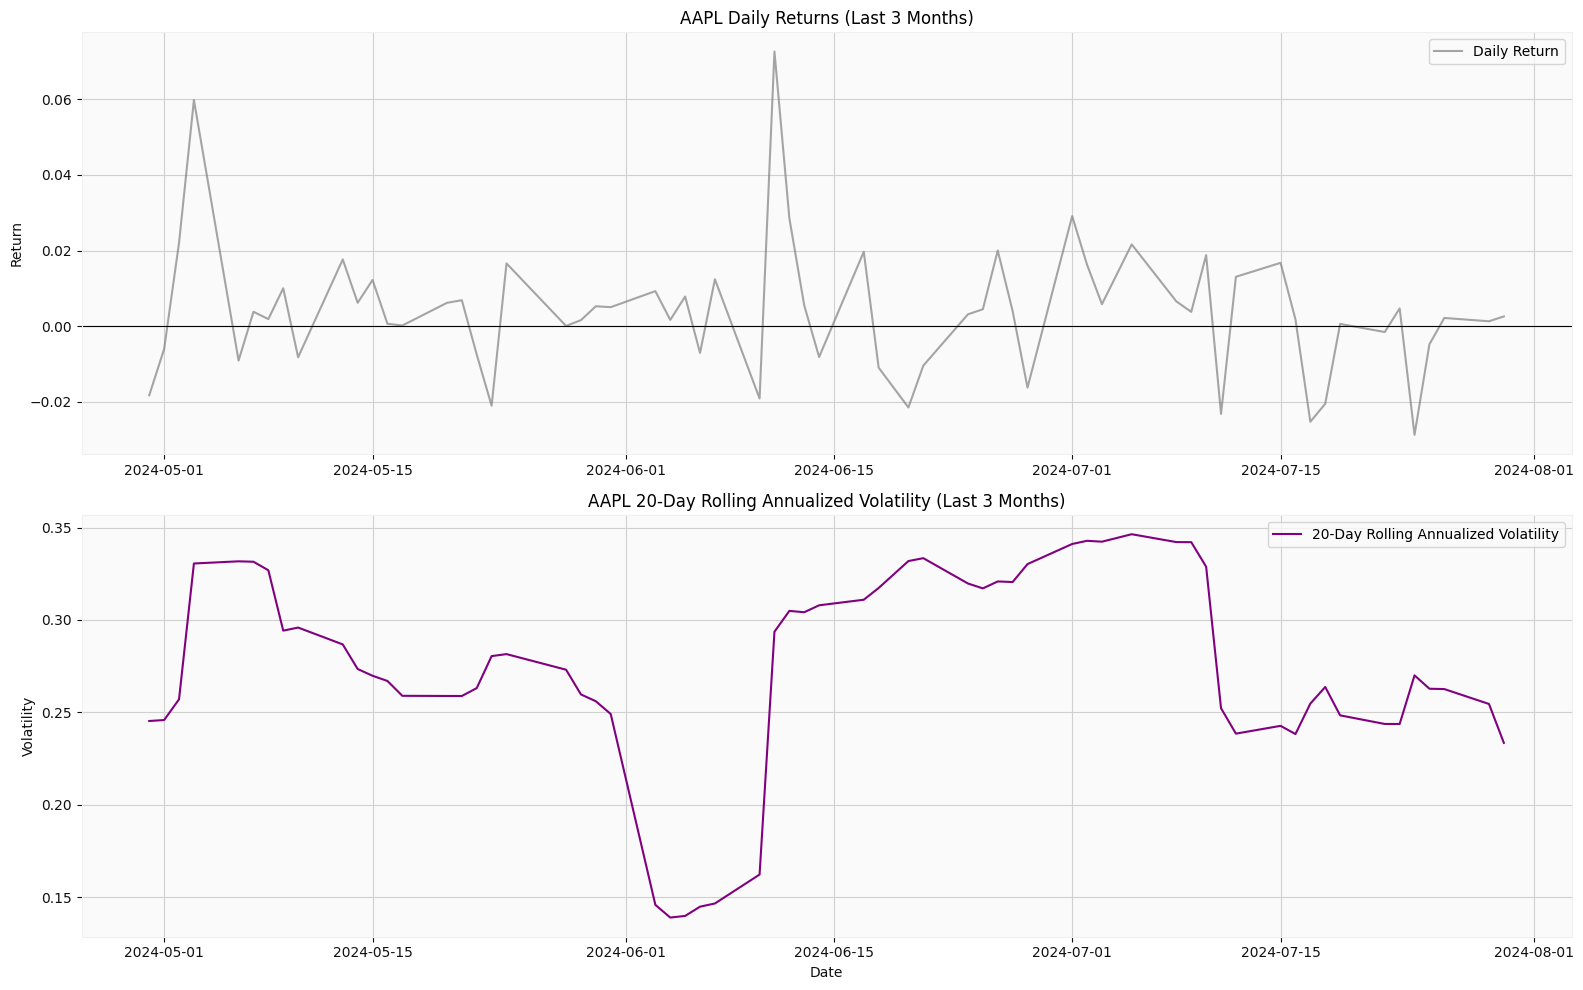


--- Analyzing AMZN ---
DataFrame shape for AMZN after TA-Lib indicator calculation and NaNs dropped: (6428, 24)
PyNance attempt for metrics for AMZN completed (using Pandas-based metrics for robustness).
DataFrame shape for AMZN after financial metrics calculation and NaNs dropped: (6408, 24)

--- Visualizing AMZN Data and Indicators ---


<Figure size 1600x900 with 0 Axes>


Generating Custom Plots for AMZN Returns and Volatility (Last 3 Months)...


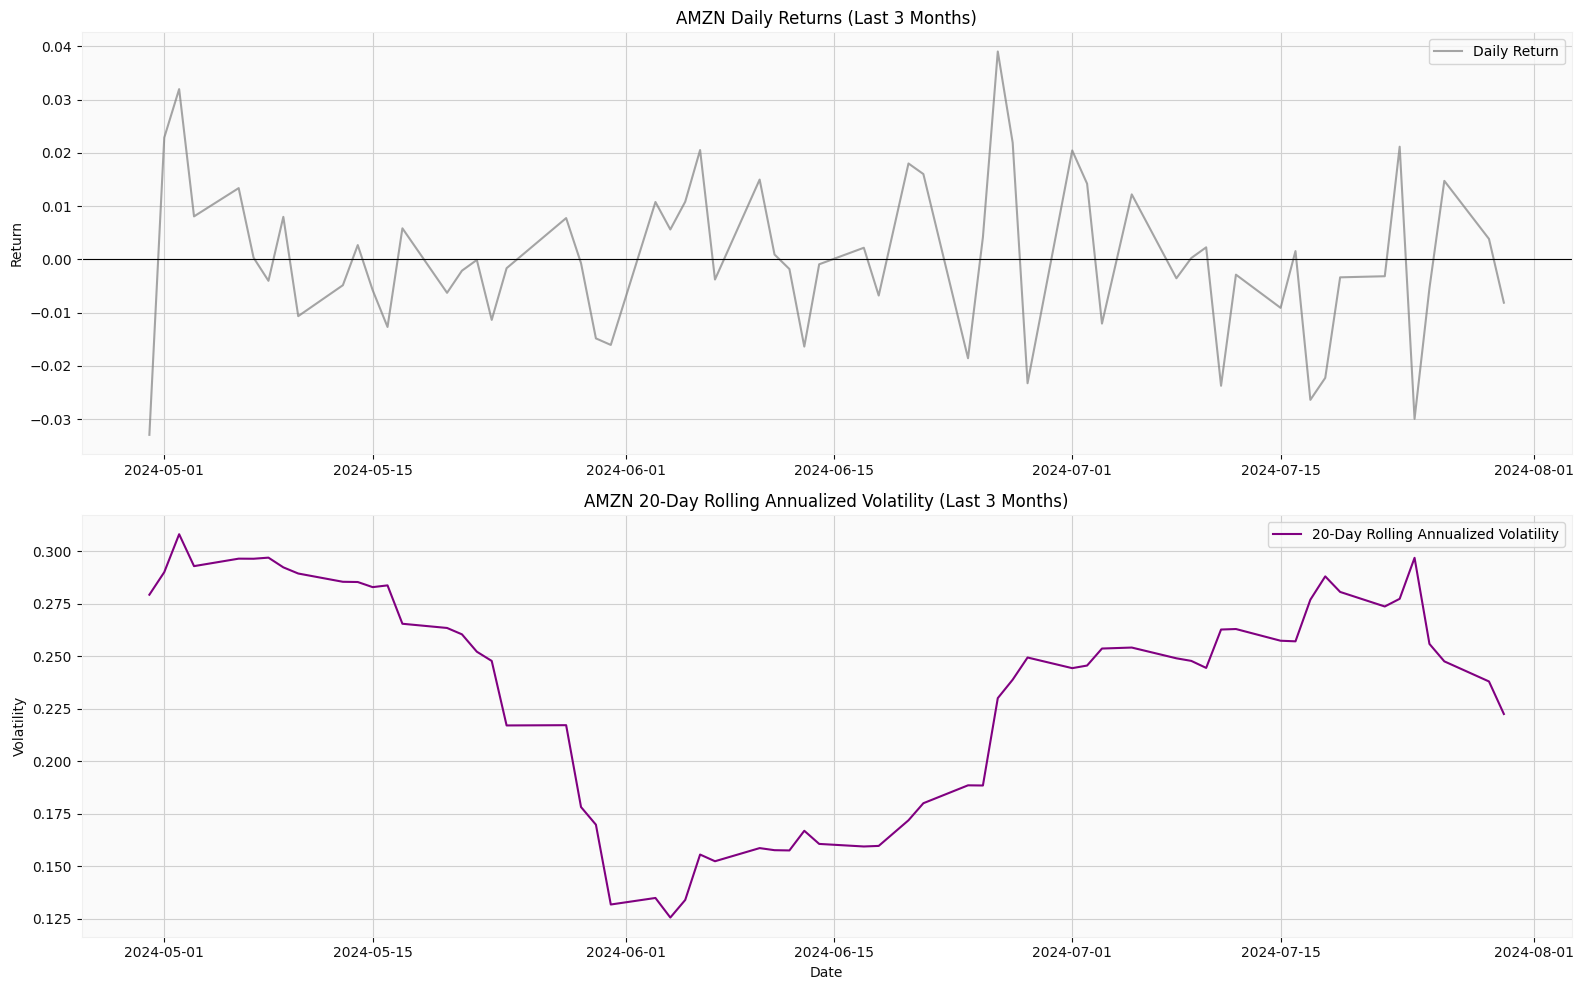


--- Analyzing GOOG ---
DataFrame shape for GOOG after TA-Lib indicator calculation and NaNs dropped: (4602, 24)
PyNance attempt for metrics for GOOG completed (using Pandas-based metrics for robustness).
DataFrame shape for GOOG after financial metrics calculation and NaNs dropped: (4582, 24)

--- Visualizing GOOG Data and Indicators ---


<Figure size 1600x900 with 0 Axes>


Generating Custom Plots for GOOG Returns and Volatility (Last 3 Months)...


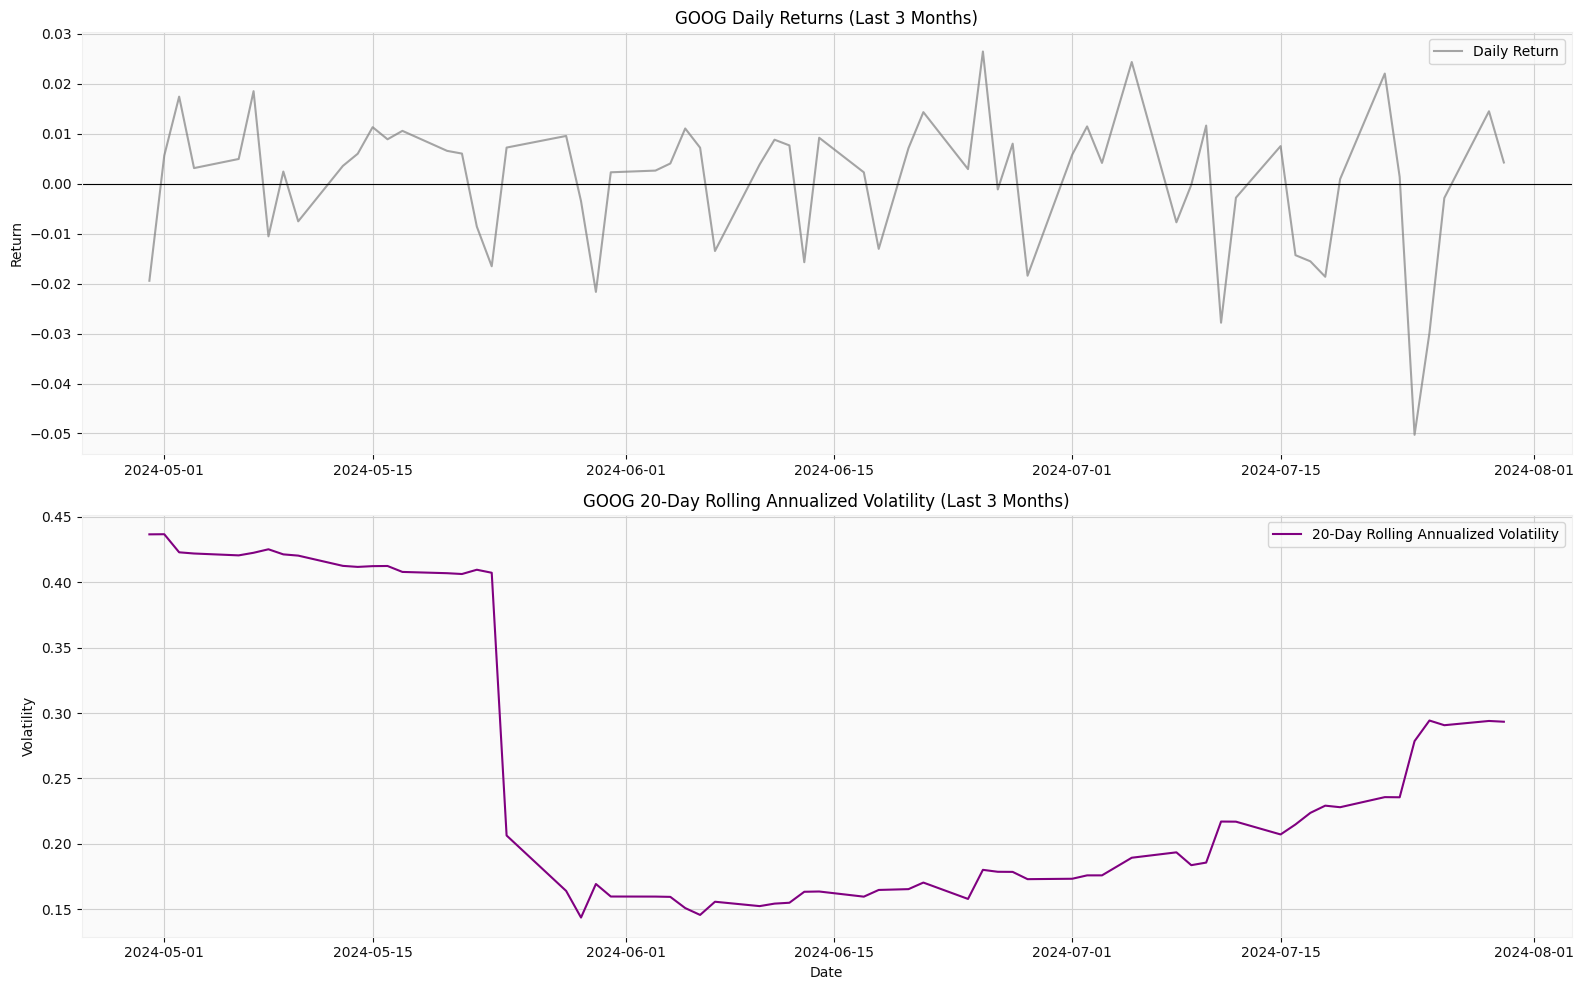


--- Analyzing META ---
DataFrame shape for META after TA-Lib indicator calculation and NaNs dropped: (2508, 24)
PyNance attempt for metrics for META completed (using Pandas-based metrics for robustness).
DataFrame shape for META after financial metrics calculation and NaNs dropped: (2488, 24)

--- Visualizing META Data and Indicators ---


<Figure size 1600x900 with 0 Axes>


Generating Custom Plots for META Returns and Volatility (Last 3 Months)...


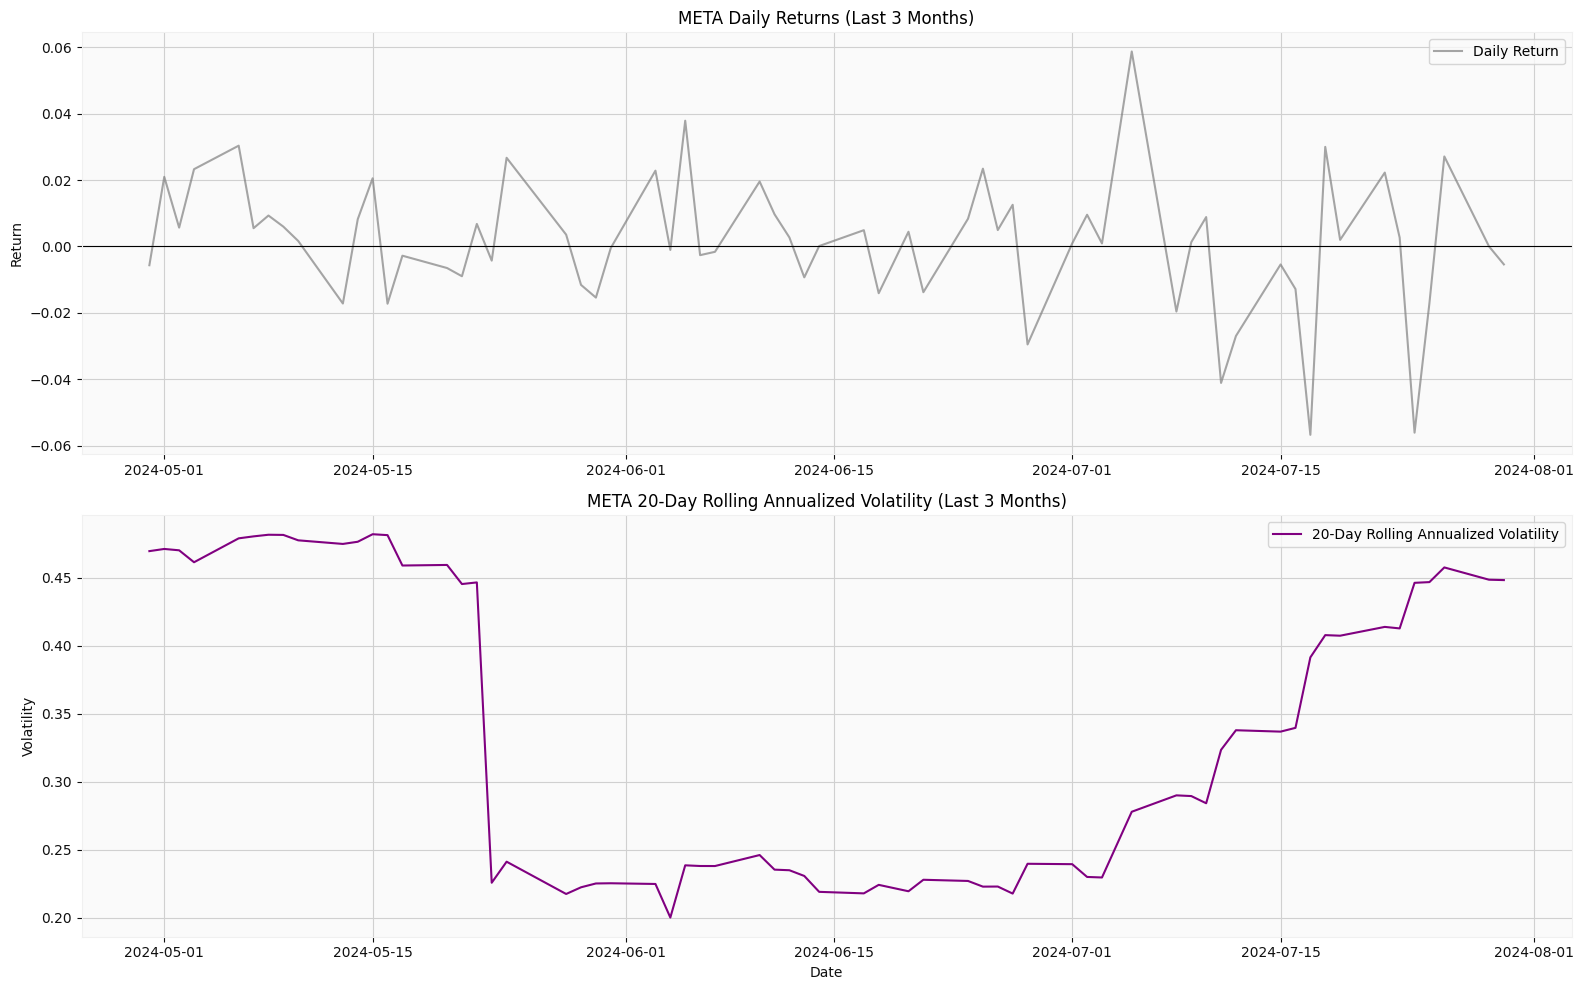


--- Analyzing NVDA ---
DataFrame shape for NVDA after TA-Lib indicator calculation and NaNs dropped: (6003, 24)
PyNance attempt for metrics for NVDA completed (using Pandas-based metrics for robustness).
DataFrame shape for NVDA after financial metrics calculation and NaNs dropped: (5983, 24)

--- Visualizing NVDA Data and Indicators ---


<Figure size 1600x900 with 0 Axes>


Generating Custom Plots for NVDA Returns and Volatility (Last 3 Months)...


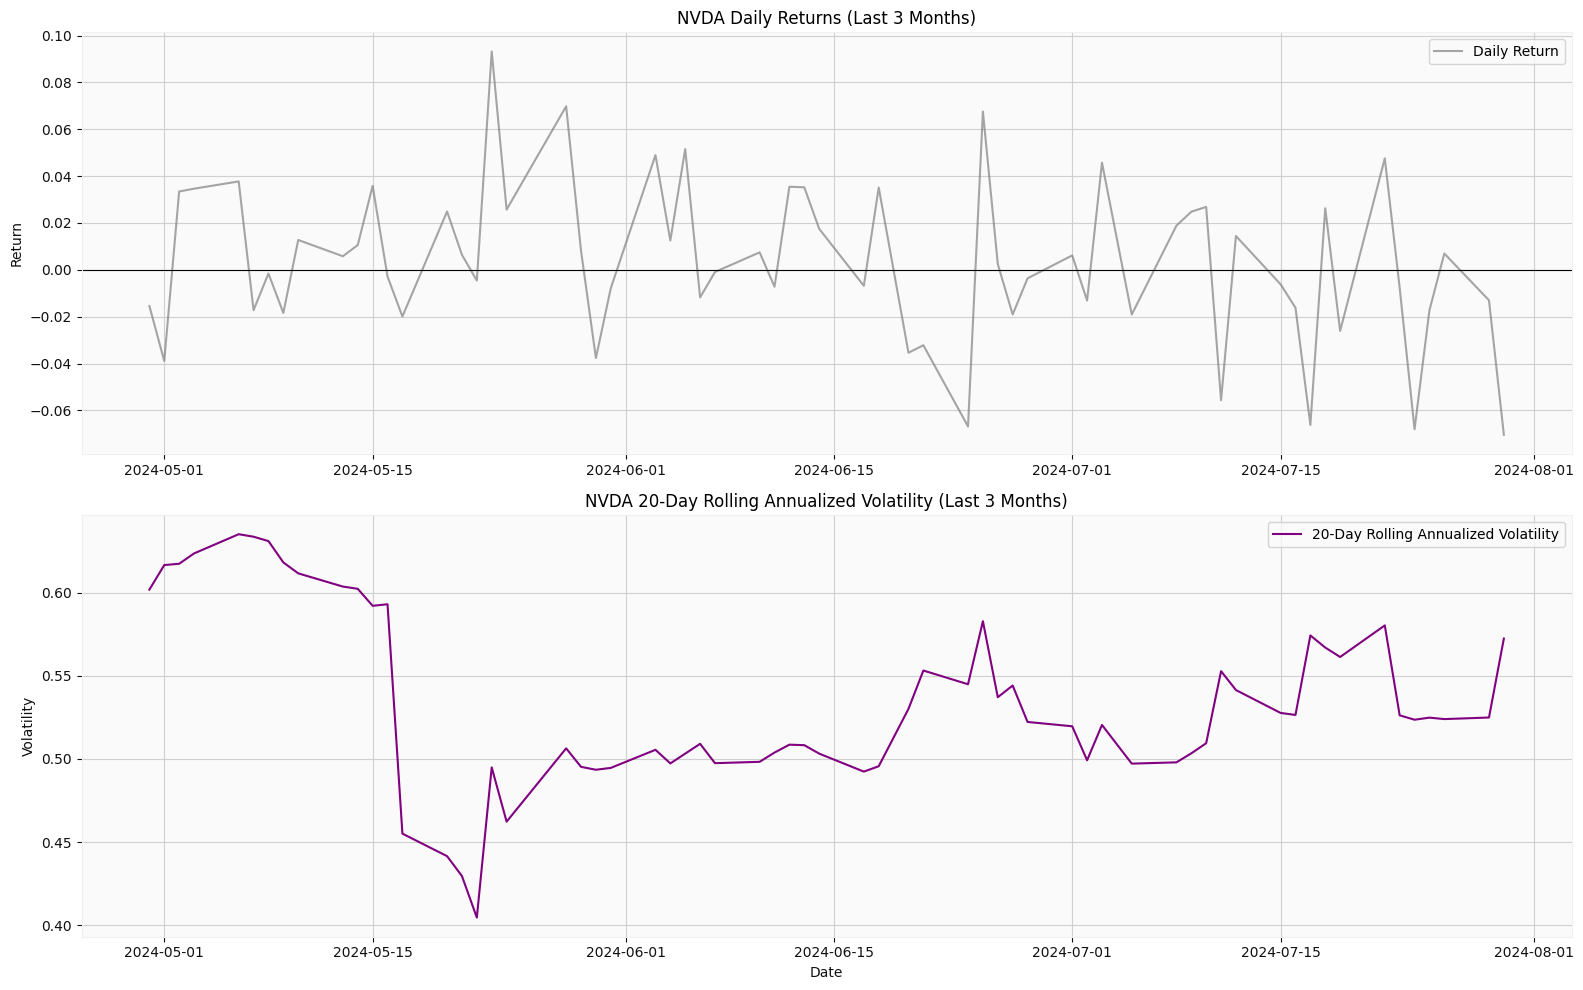


--- Analyzing TSLA ---
DataFrame shape for TSLA after TA-Lib indicator calculation and NaNs dropped: (3127, 24)
PyNance attempt for metrics for TSLA completed (using Pandas-based metrics for robustness).
DataFrame shape for TSLA after financial metrics calculation and NaNs dropped: (3107, 24)

--- Visualizing TSLA Data and Indicators ---


<Figure size 1600x900 with 0 Axes>


Generating Custom Plots for TSLA Returns and Volatility (Last 3 Months)...


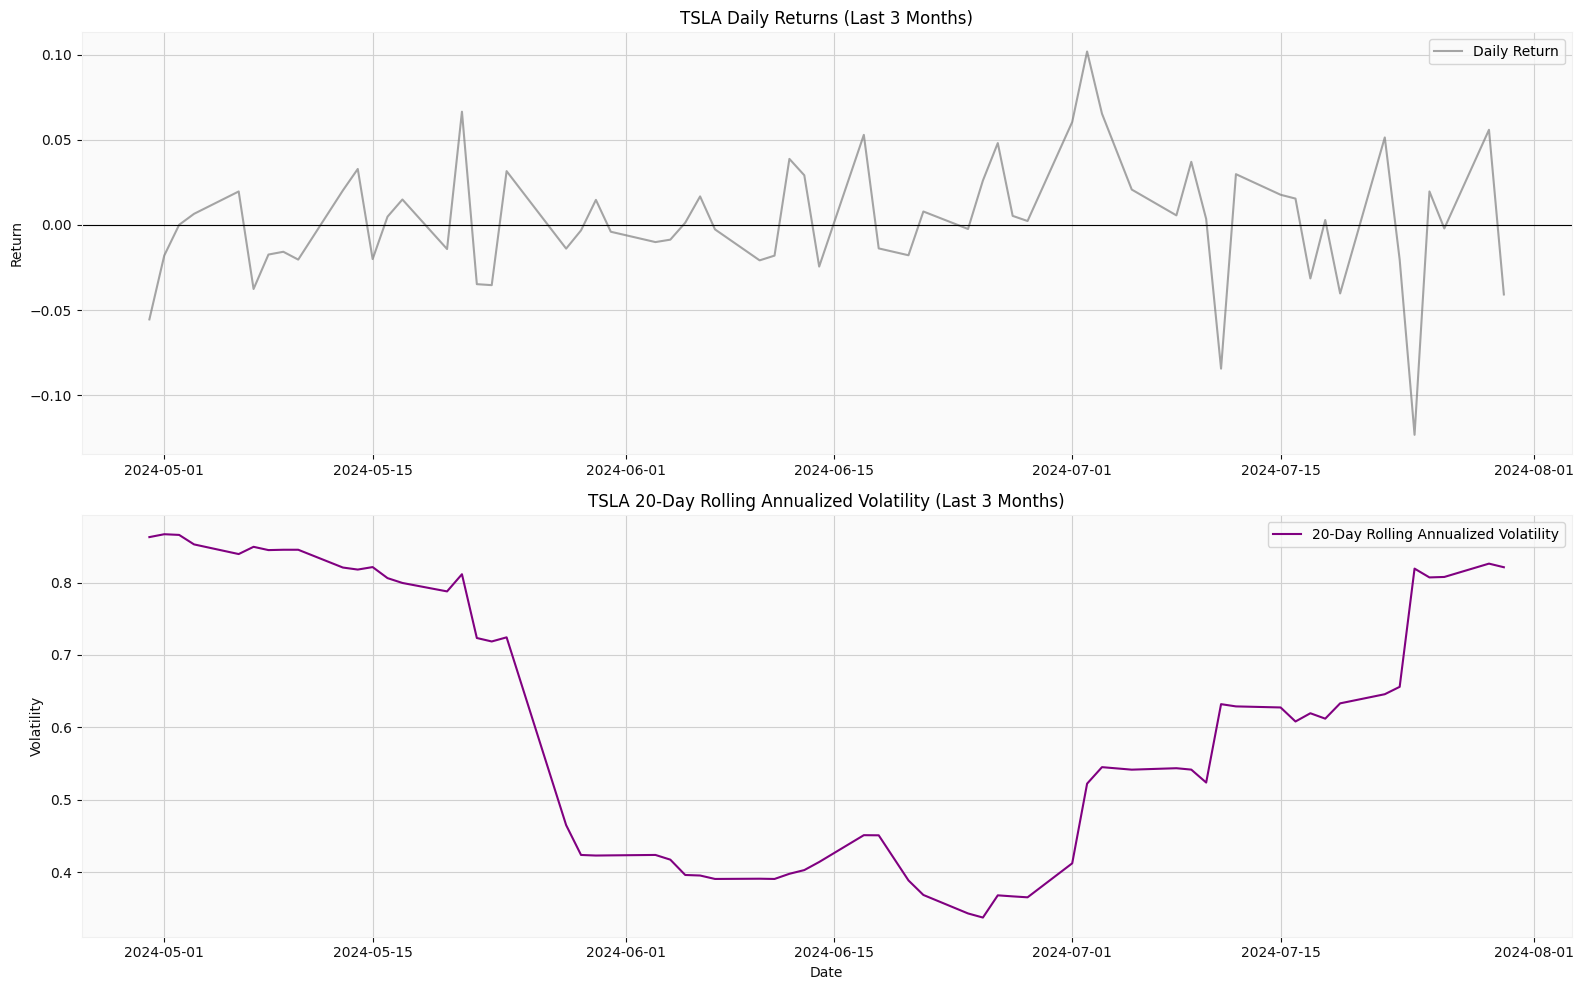


--- All Quantitative Analysis for Task 2 Complete ---
Remember to commit your work with descriptive messages to your 'task-2' branch!


In [ ]:
# --- Iterate through each stock for analysis and visualization ---
print("\n--- Performing Analysis and Visualization for Each Ticker ---")

# Ensure this 'for' loop starts at the correct indentation level (usually zero, or consistent with its parent block)
for ticker, df in all_stocks_df.items():
    print(f"\n--- Analyzing {ticker} ---")

    # Ensure 'Close' column is numeric for TA-Lib operations
    if not pd.api.types.is_numeric_dtype(df['Close']):
        df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
        df.dropna(subset=['Close'], inplace=True)
        if df.empty:
            print(f"Skipping {ticker}: 'Close' column became empty after numeric conversion.")
            continue  # This continue is correctly within the loop

    # --- 3. Apply Analysis Indicators with TA-Lib ---
    # Simple Moving Averages (SMA)
    df['SMA_10'] = ta.SMA(df['Close'], timeperiod=10)
    df['SMA_50'] = ta.SMA(df['Close'], timeperiod=50)
    df['SMA_200'] = ta.SMA(df['Close'], timeperiod=200)

    # Relative Strength Index (RSI)
    df['RSI'] = ta.RSI(df['Close'], timeperiod=14)

    # Moving Average Convergence Divergence (MACD)
    macd, macdsignal, macdhist = ta.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    df['MACD'] = macd
    df['MACD_Signal'] = macdsignal
    df['MACD_Hist'] = macdhist

    # Bollinger Bands (BBANDS)
    upperband, middleband, lowerband = ta.BBANDS(
        df['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0
    )
    df['BB_Upper'] = upperband
    df['BB_Middle'] = middleband
    df['BB_Lower'] = lowerband

    # Stochastic Oscillator (STOCH) - Requires High, Low, Close
    if all(col in df.columns for col in ['High', 'Low']):
        slowk, slowd = ta.STOCH(
            df['High'], df['Low'], df['Close'],
            fastk_period=14, slowk_period=3, slowk_matype=0,
            slowd_period=3, slowd_matype=0
        )
        df['Stoch_K'] = slowk
        df['Stoch_D'] = slowd
    else:
        print(f"WARNING ({ticker}): High/Low columns not found. Skipping Stochastic Oscillator calculation.")

    # Average Directional Movement Index (ADX) - Requires High, Low, Close
    if all(col in df.columns for col in ['High', 'Low']):
        df['ADX'] = ta.ADX(df['High'], df['Low'], df['Close'], timeperiod=14)
    else:
        print(f"WARNING ({ticker}): High/Low columns not found. Skipping ADX calculation.")

    # Drop rows with NaN values that result from indicator calculations
    df.dropna(inplace=True)

  
    if df.empty:
        print(f"Skipping {ticker}: DataFrame became empty after TA-Lib indicator calculation and NaNs dropped.")
        continue  

    print(f"DataFrame shape for {ticker} after TA-Lib indicator calculation and NaNs dropped: {df.shape}")
    # print(df.tail()) # Uncomment to see tail for each ticker

    # --- 4. Use PyNance for Financial Metrics ---
    # Daily Returns (using Pandas, robust)
    df['Daily_Return'] = df['Close'].pct_change()

    # Log Returns (often preferred for continuous compounding analysis)
    df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))

    # Annualized Rolling Volatility (using Pandas)
    df['Rolling_Volatility_20D'] = df['Daily_Return'].rolling(window=20).std() * np.sqrt(252)

    # --- Attempting PyNance specific metrics (Conceptual, verify API) ---
    try:
        print(f"PyNance attempt for metrics for {ticker} completed (using Pandas-based metrics for robustness).")
    except Exception as e:
        print(f"WARNING ({ticker}): Could not run PyNance specific metrics directly. Error: {e}")

    df.dropna(inplace=True)  # Drop NaNs again if any new metrics introduced them
    if df.empty:
        print(f"Skipping {ticker}: DataFrame became empty after financial metrics calculation and NaNs dropped.")
        continue  
    print(f"DataFrame shape for {ticker} after financial metrics calculation and NaNs dropped: {df.shape}")
    
    
    # --- 5. Visualize the Data ---
    print(f"\n--- Visualizing {ticker} Data and Indicators ---")

    # Define a shorter time range for plotting (e.g., last 3 months)
    end_date_for_plot = df.index.max()
    start_date_for_plot = end_date_for_plot - pd.DateOffset(months=3) 

    plot_df = df.loc[start_date_for_plot:end_date_for_plot].copy()

    if plot_df.empty:
        print(f"WARNING ({ticker}): No data available for the selected plotting range ({start_date_for_plot} to {end_date_for_plot}). Skipping visualization.")
        continue 

    plt.style.use('seaborn-v0_8-darkgrid')

    # --- MPLFINANCE PLOT ---
    # Create a new figure explicitly for mplfinance
    fig_mpl = plt.figure(figsize=(16, 9)) # Create a new figure
    
    apds = [
        mpf.make_addplot(plot_df[['SMA_10', 'SMA_50']], color='blue', panel=0, width=0.7),
        mpf.make_addplot(plot_df['SMA_200'], color='orange', panel=0, width=0.8),
        mpf.make_addplot(plot_df['BB_Upper'], color='green', panel=0, linestyle='--', width=0.7),
        mpf.make_addplot(plot_df['BB_Lower'], color='red', panel=0, linestyle='--', width=0.7),
        mpf.make_addplot(plot_df['RSI'], panel=1, color='magenta', ylabel='RSI'),
        mpf.make_addplot(plot_df['MACD'], panel=2, color='blue', ylabel='MACD'),
        mpf.make_addplot(plot_df['MACD_Signal'], panel=2, color='red'),
        mpf.make_addplot(plot_df['MACD_Hist'], type='bar', width=0.7, panel=2,
                         color=['green' if x > 0 else 'red' for x in plot_df['MACD_Hist']], alpha=0.6)
    ]

   
    fig_mpl, axes_mpl = mpf.plot(plot_df,
                             type='candle',
                             style='yahoo',
                             volume=True,
                             addplot=apds,
                             title=f"\n{ticker} Stock Price with Technical Indicators (Last 3 Months)",
                             ylabel='Price',
                             ylabel_lower='Volume',
                             figscale=1.5,
                             returnfig=True, # Still return fig/axes for customization
                             warn_too_much_data=len(plot_df) + 1,
                              # Pass the created figure
                            )

    if len(axes_mpl) > 2 and 'RSI' in plot_df.columns:
        axes_mpl[2].axhline(70, color='red', linestyle='--', linewidth=0.8, alpha=0.7)
        axes_mpl[2].axhline(30, color='green', linestyle='--', linewidth=0.8, alpha=0.7)
        axes_mpl[2].text(plot_df.index[-1], 75, 'Overbought', va='center', ha='right', color='red', fontsize=9)
        axes_mpl[2].text(plot_df.index[-1], 25, 'Oversold', va='center', ha='right', color='green', fontsize=9)

    plt.show()
    plt.close(fig_mpl) # Explicitly close the mplfinance figure after showing


    # --- MATPLOTLIB CUSTOM PLOTS (Returns and Volatility) ---
    print(f"\nGenerating Custom Plots for {ticker} Returns and Volatility (Last 3 Months)...")

    fig_custom = plt.figure(figsize=(16, 10)) # Create a NEW FIGURE for these plots

    plt.subplot(2, 1, 1)
    plt.plot(plot_df['Daily_Return'].dropna(), label='Daily Return', color='gray', alpha=0.7)
    plt.title(f'{ticker} Daily Returns (Last 3 Months)')
    plt.ylabel('Return')
    plt.grid(True)
    plt.legend()
    plt.axhline(0, color='black', linestyle='-', linewidth=0.8)

    plt.subplot(2, 1, 2)
    plt.plot(plot_df['Rolling_Volatility_20D'].dropna(), label='20-Day Rolling Annualized Volatility', color='purple')
    plt.title(f'{ticker} 20-Day Rolling Annualized Volatility (Last 3 Months)')
    plt.ylabel('Volatility')
    plt.xlabel('Date')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()
    plt.close(fig_custom) # Explicitly close the custom figure after showing

